## MSDS 7331: Data Mining
## Lab 1: Visualization and Data Preprocessing
## 26 May 2019
## Authors: Meredith Ludlow, Anand Rajan, Kristen Rollins, and Tej Tenmattam

---

### Business Understanding

<div class="alert alert-block alert-info">
<b>Rubric 1:</b> Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.
</div>

The Census buereau data presents census data the entire US and includes Puerto Rico and DC. The data is 5 year estimates from 2015 American community survey. The data contains 37 socio economic data, the race, sex and is produced for all counties. Here we only select the summaries of US states for our study. While we see in reports (ref:American community survey release) that the poverty of many counties decreased over the last 5 years and median income has increased, we want to see how this has affected our nations economy interms of Unemployment and poverty eradication. Important thing to note in the same report is that there were counties which had negative growth reported as well. 
As per numbers on poverty index by state we see anything beyond 19 percent being really poor. 
Based on the statistics it will be interesting to analyse the Child poverty and Unemployment features provided in the data. We can use the data to mine and predict future trends also. The available features collected on the data set can be attributed to the two variables chosenn for study.

### Data Meaning Type

<div class="alert alert-block alert-info">
<b>Rubric 2:</b> Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.
</div>

We selected the Census data 2017 by American community survey from __[Kaggle](https://www.kaggle.com/muonneutrino/us-census-demographic-data)__. It has data from the entire US and can be used for analysis and would provide interesting insights. Full sets of data are found in the American fact finder website.  We will be using acs2017_census_data.csv for our analysis.
We have 37 variables available for our analysis. There are 74,001 rows in total and we will be utilizing all data for our analysis. We will be using main attributes that could be used to predict unemployment in each state and poverty rate. We can also predict state through classification or do regression analysis on unemployment or income.

Acknowledgement goes to Census bureau of the US. Since this is US federal government product, copyrights are not violated if used within the US.
The attribute definitions are as follows:

| Attribute | Data Type | Description |
|-----------|-----------|-------------|
| TractID | Nominal | Unique identification number for the census tract <br/> (A tract is a geographic area, comparable to a neighborhood, <br/> defined for the purpose of taking a census.) |
| State | Nominal | U.S. state or territory the tract is located in |
| County | Nominal | County or county-equivalent the tract is located in |
| TotalPop | Integer | Total population of the census area |
| Men | Integer | Number of men living in the census tract |
| Women | Integer | Number of women living in the census tract |
| Hispanic | Decimal | Percentage of population that is Hispanic/Latino |
| White | Decimal | Percentage of population that is white |
| Black | Decimal | Percentage of population that is black |
| Native | Decimal | Percent of population that is Native American |
| Asian | Decimal | Percent of population that is Asian |
| Pacific | Decimal | Percent of population that is Native Hawaiian or other Pacific Islander |
| VotingAgeCitizen | Integer | Number of voting age citizens in the census tract |
| Income | Decimal | Median household income in USD (\$) |
| IncomeErr | Decimal | Median household income error (\$) |
| IncomePerCap | Decimal | Income per capita (\$) |
| IncomePerCapErr | Decimal | Income per capita error (\$) |
| Poverty | Decimal | Percentage of population under the poverty level |
| ChildPoverty | Decimal | Percentage of children under the poverty level |
| Professional | Decimal | Percent employed in management, business, science, and arts |
| Service | Decimal | Percent employed in service jobs |
| Office | Decimal | Percent employed in sales and office jobs |
| Construction | Decimal | Percent employed in natural resources, construction, and maintenance |
| Production | Decimal | Percent employed in production, transportation, and material movement |
| Drive | Decimal | Percent commuting alone in a car, van, or truck |
| Carpool | Decimal | Percent carpooling in a car, van, or truck |
| Transit | Decimal | Percent commuting on public transportation |
| Walk | Decimal | Percent walking to work |
| OtherTransp | Decimal | Percent commuting via other means |
| WorkAtHome | Decimal | Percentage working at home |
| MeanCommute | Decimal | Mean commute time in minutes |
| Employed | Integer | Number of people employed (16+) |
| PrivateWork | Decimal | Percentage employed in private industry |
| PublicWork | Decimal | Percentage employed in public jobs |
| SelfEmployed | Decimal | Percent self-employed
| FamilyWork | Decimal | Percentage in unpaid family work |
| Unemployed | Decimal | Unemployment rate (%) |

### Data Quality

<div class="alert alert-block alert-info">
<b>Rubric 3:</b> Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.
</div>

Before jumping into analysis, it was important for us to verify the quality of our data. After importing various libraries and our dataset, we first verified that there were no duplicates by checking the uniqueness of the TractID field. Because this field was stated to be an identifier for each geographic area of the census, we assumed that there would be no duplicates; we confirmed this to be safe. 

We also viewed missing values occuring in each column. Upon investigation, we found that many NaNs were occuring because several tracts had a population of 0, leading to invalid percentages for other variables. These missing values were not mistakes in the data, because it is possible for census tracts to be unpopulated. However, it does not make sense to predict poverty or unemployment rates for empty areas, so we chose to remove these observations. To deal with the remaining missing values, we performed imputation to the median, some aggregated over another variable. We favored the median over the mean because the median is not heavily influenced by outliers.

Finally, to identify potential outliers we looked at summary statistics of our numeric variables. While it is difficult to detect outliers in such a high-dimensional space, in this way we could identify out of the ordinary minimums and maximums, especially with so many percentage attributes. For instance, if a percentage variable had a minimum less than 0 or maximum greater than 100, this would certainly have been an error in the data. We did not observe any mistakes such as this, and we felt that the non-percentage variables had reasonable statistics as well. Therefore we did not remove any outliers. 

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
print(os.listdir("Data")) # view our data files

# Set seaborn plot styles
sns.set_style('darkgrid')
sns.set_color_codes('muted')
sns.set_context(rc = {'patch.linewidth': 0.0})

import warnings
warnings.filterwarnings("ignore") # ignore warnings for clean report

# Statistics imports
import scipy, scipy.stats

# df.head() displays all the columns without truncating
pd.set_option('display.max_columns', None)

['acs2015_census_tract_data.csv', 'acs2017_county_data.csv', 'acs2017_census_tract_data.csv', 'acs2015_county_data.csv']


In [2]:
# reading csv file as pandas dataframe
df_17_census = pd.read_csv('Data/acs2017_census_tract_data.csv')

In [3]:
df_17_census['TractId'].is_unique # if data does not have duplicates

True

As the tract IDs are unique, we have no duplicate data.

In [4]:
# Set TractID as index on the records
df_17_census.set_index('TractId', inplace=True)
df_17_census.head() # view first 5 rows of our data

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TractId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [5]:
df_17_census.info() # list all columns and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74001 entries, 1001020100 to 72153750602
Data columns (total 36 columns):
State               74001 non-null object
County              74001 non-null object
TotalPop            74001 non-null int64
Men                 74001 non-null int64
Women               74001 non-null int64
Hispanic            73305 non-null float64
White               73305 non-null float64
Black               73305 non-null float64
Native              73305 non-null float64
Asian               73305 non-null float64
Pacific             73305 non-null float64
VotingAgeCitizen    74001 non-null int64
Income              72885 non-null float64
IncomeErr           72885 non-null float64
IncomePerCap        73256 non-null float64
IncomePerCapErr     73256 non-null float64
Poverty             73159 non-null float64
ChildPoverty        72891 non-null float64
Professional        73190 non-null float64
Service             73190 non-null float64
Office              73190 

Here we see that the pandas data types for each attribute match those in our data description table, as the pandas "object" type represents a string. Therefore we do not have to make any type conversions. We do observe that not all attributes have the same number of observations, so we will investigate missing values further.

In [6]:
# View initial summary statistics on data features
df_17_census.describe() 

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,74001.000000,74001.000000,74001.000000,73305.000000,73305.000000,73305.00000,73305.000000,73305.000000,73305.000000,74001.000000,72885.000000,72885.000000,73256.000000,73256.000000,73159.000000,72891.000000,73190.000000,73190.000000,73190.000000,73190.000000,73190.000000,73200.000000,73200.000000,73200.000000,73200.000000,73200.000000,73200.000000,73055.000000,74001.000000,73190.000000,73190.000000,73190.000000,73190.000000,73191.000000
mean,4384.716017,2157.710707,2227.005311,17.265444,61.309043,13.28910,0.734047,4.753691,0.147341,3102.885961,61086.829265,9697.465747,30651.804194,4270.174225,16.118186,21.155872,35.559478,18.874446,23.427724,9.239350,12.899281,75.698005,9.308369,5.395186,3.042825,1.894605,4.661466,26.056594,2049.152052,79.494222,14.163342,6.171484,0.171164,7.246738
std,2228.936729,1120.560504,1146.240218,23.073811,30.634461,21.60118,4.554247,8.999888,1.029250,1542.245024,30516.098180,6154.669518,16126.937143,3148.049041,12.691045,18.645759,15.144984,8.137261,5.806091,6.031393,7.712496,15.292660,5.222494,11.689470,5.805753,2.549374,4.014940,7.124524,1138.865457,8.126383,7.328680,3.932364,0.456580,5.227624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2692.000000,728.000000,32.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2903.000000,1416.000000,1465.000000,2.600000,38.000000,0.80000,0.000000,0.200000,0.000000,2061.000000,40357.000000,5735.000000,20556.750000,2503.000000,6.900000,6.200000,24.700000,13.300000,19.700000,5.000000,7.100000,72.200000,5.700000,0.000000,0.400000,0.400000,2.000000,21.100000,1276.000000,75.200000,9.300000,3.500000,0.000000,3.900000
50%,4105.000000,2007.000000,2082.000000,7.400000,70.400000,3.80000,0.000000,1.500000,0.000000,2905.000000,54375.000000,8267.000000,27215.500000,3404.000000,12.600000,16.300000,33.300000,17.700000,23.200000,8.300000,11.800000,79.900000,8.500000,1.000000,1.400000,1.200000,3.800000,25.400000,1895.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,5506.000000,2707.000000,2803.000000,21.100000,87.700000,14.60000,0.400000,5.000000,0.000000,3906.000000,74659.000000,11913.000000,36408.250000,4968.250000,21.800000,31.600000,44.900000,23.300000,26.900000,12.500000,17.500000,84.900000,11.900000,4.600000,3.300000,2.500000,6.300000,30.300000,2635.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.00000,100.000000,100.000000,71.900000,39389.000000,249750.000000,153365.000000,220253.000000,134017.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [7]:
#Total number of cells
totCells=np.product(df_17_census.shape)

#Total count of missing values by column
misCnt = df_17_census.isnull().sum()

#Total of all missing counts columns
totMisCnt = misCnt.sum()

#Percentage of missing values among total
print("The 2017 census dataset contains", round(((totMisCnt/totCells) * 100), 2), "% missing values.")

The 2017 census dataset contains 0.89 % missing values.


In [8]:
#Count number of rows containing any missing values
misRows = df_17_census.isnull().any(axis=1).sum()
#Total rows in dataset
totRows = df_17_census.shape[0]
print("The 2017 census dataset contains", round(((misRows/totRows) * 100), 2),"% rows with missing values.")

The 2017 census dataset contains 1.73 % rows with missing values.


In [9]:
#View rows having any null values
df_17_census[df_17_census.isnull().any(axis=1)].head(10)

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TractId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1003990000,Alabama,Baldwin County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1015981901,Alabama,Calhoun County,8,4,4,0.0,100.0,0.0,0.0,0.0,0.0,8,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1015981902,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1015981903,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1097003605,Alabama,Mobile County,757,208,549,2.9,66.4,25.1,0.0,0.5,0.0,732,NaN,NaN,2569.0,369.0,NaN,NaN,23.5,21.2,43.5,4.6,7.3,27.2,13.4,6.1,37.4,1.2,14.6,13.7,260,79.2,11.9,4.2,4.6,16.9
1097990000,Alabama,Mobile County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1117980000,Alabama,Shelby County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1125011200,Alabama,Tuscaloosa County,7307,3454,3853,2.1,82.1,10.2,0.3,2.9,0.3,7004,25833.0,5071.0,5632.0,608.0,16.7,NaN,33.6,30.4,33.7,1.0,1.3,42.2,1.8,1.9,22.5,6.5,25.0,12.5,1148,47.0,51.0,2.0,0.0,31.2
2185000300,Alaska,North Slope Borough,2783,2267,516,3.5,80.6,1.0,10.0,2.3,0.2,2750,NaN,NaN,99450.0,10698.0,1.8,NaN,31.2,13.9,10.7,24.9,19.3,9.5,7.9,6.8,74.1,0.4,1.3,6.3,2772,99.7,0.3,0.0,0.0,0.1


By peeking at some rows having missing values, we see that there are tracts that have a population of 0. This caused all of the percentage attributes to be Not a Number (NaN), because dividing by 0 is invalid. It does not make sense to predict poverty or unemployment rates for areas with no one living there. Thus we chose to omit the observations where the total population is 0.

In [10]:
#Drop tracts where population is 0
df_17_cln = df_17_census.drop(df_17_census[df_17_census.TotalPop == 0].index)
print ("-Attribute-        -Null Count-")
df_17_cln.isnull().sum() # view remaining NAs

-Attribute-        -Null Count-


State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic              0
White                 0
Black                 0
Native                0
Asian                 0
Pacific               0
VotingAgeCitizen      0
Income              420
IncomeErr           420
IncomePerCap         49
IncomePerCapErr      49
Poverty             146
ChildPoverty        414
Professional        115
Service             115
Office              115
Construction        115
Production          115
Drive               105
Carpool             105
Transit             105
Walk                105
OtherTransp         105
WorkAtHome          105
MeanCommute         250
Employed              0
PrivateWork         115
PublicWork          115
SelfEmployed        115
FamilyWork          115
Unemployment        114
dtype: int64

After fixing this issue, we noticed that some tracts still did not have data for unemployment or child poverty rates. Because these are the attributes that we want to predict, it would unfairly aid our predictions if we were to impute these values, whether by imputing to the mean or median or regressing based on some other attribute. Therefore we chose to delete rows having no data for unemployment or child poverty rates.

In [11]:
#Drop tracts where child poverty or unemployment is null
df_17_cln = df_17_cln[np.isfinite(df_17_cln['ChildPoverty'])]
df_17_cln = df_17_cln[np.isfinite(df_17_cln['Unemployment'])]
print ("-Attribute-        -Null Count-")
df_17_cln.isnull().sum() # view remaining NAs

-Attribute-        -Null Count-


State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic              0
White                 0
Black                 0
Native                0
Asian                 0
Pacific               0
VotingAgeCitizen      0
Income              146
IncomeErr           146
IncomePerCap          9
IncomePerCapErr       9
Poverty               0
ChildPoverty          0
Professional          1
Service               1
Office                1
Construction          1
Production            1
Drive                 2
Carpool               2
Transit               2
Walk                  2
OtherTransp           2
WorkAtHome            2
MeanCommute          69
Employed              0
PrivateWork           1
PublicWork            1
SelfEmployed          1
FamilyWork            1
Unemployment          0
dtype: int64

There are still a few missing values in our dataset that we can now impute. In visualizations in a later section, we found that there is wide variation of median income among the states. Therefore, we chose to impute income and income error values to the median for the observation's respective state. The remaining attributes with missing values we imputed to the overall median for that variable.

In [12]:
#Impute to the median by each state
df_grouped = df_17_cln.groupby('State').transform(lambda x: x.fillna(x.median()))
df_17_cln['Income'] = df_grouped['Income']
df_17_cln['IncomeErr'] = df_grouped['IncomeErr']

#Impute remaining values to the overall median
df_17_cln = df_17_cln.fillna(df_17_cln.median())
print ("-Attribute-        -Null Count-")
df_17_cln.isnull().sum() # view remaining NAs

-Attribute-        -Null Count-


State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

We have now successfully removed or imputed all missing values in our original dataset.

In [13]:
df_17_cln.describe() # summary stats for numeric variables

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.00000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000
mean,4438.372759,2182.350698,2256.022061,17.290081,61.312817,13.268165,0.729703,4.752853,0.146698,3137.878459,61111.961002,9694.920825,30702.626734,4259.381073,16.067164,21.155081,35.566003,18.855030,23.407072,9.256663,12.915429,75.823635,9.323555,5.387234,2.95396,1.888721,4.623234,26.078983,2078.009535,79.506605,14.151449,6.170819,0.171328,7.235223
std,2192.532931,1101.516460,1126.275010,23.097490,30.635700,21.598962,4.525143,8.992743,1.023074,1514.686755,30492.084659,6135.953813,16059.781976,3019.532445,12.514595,18.643563,15.093914,8.037855,5.653534,5.979854,7.629365,15.062128,5.167761,11.659900,5.39858,2.518341,3.821944,7.101069,1121.667248,8.017414,7.224480,3.846069,0.455440,5.177195
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2692.000000,728.000000,949.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2953.000000,1438.000000,1491.000000,2.600000,38.100000,0.800000,0.000000,0.200000,0.000000,2093.000000,40400.000000,5740.000000,20603.000000,2507.000000,6.900000,6.200000,24.700000,13.300000,19.700000,5.000000,7.100000,72.300000,5.800000,0.000000,0.40000,0.400000,2.000000,21.100000,1302.000000,75.300000,9.300000,3.500000,0.000000,3.900000
50%,4133.000000,2022.000000,2100.000000,7.400000,70.400000,3.800000,0.000000,1.500000,0.000000,2924.000000,54434.000000,8273.000000,27242.000000,3405.000000,12.600000,16.300000,33.300000,17.700000,23.200000,8.400000,11.800000,79.900000,8.500000,1.000000,1.40000,1.200000,3.800000,25.400000,1913.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,5530.000000,2717.000000,2815.000000,21.100000,87.700000,14.500000,0.400000,5.000000,0.000000,3920.000000,74673.000000,11899.000000,36429.000000,4965.000000,21.800000,31.600000,44.900000,23.300000,26.900000,12.500000,17.500000,84.900000,11.900000,4.600000,3.30000,2.500000,6.300000,30.300000,2649.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.000000,100.000000,91.400000,71.900000,39389.000000,249750.000000,153365.000000,220253.000000,84414.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


After having dealt with missing values, we can investigate our dataset for outliers. While the nominal attributes cannot have outliers, from the summary statistics table above we can identify potential outliers in the numeric variables. For all the attributes that are percentages (Hispanic, White, Black, etc.), there are none that have a minimum less than 0 or a maximum greater than 100. So we did not detect any errors there. For the non-percentage attributes (TotalPop, Men, Women, VotingAgeCitizen, etc.), we were satisfied overall with the distributions of values. There were some columns with rather large maximum values (e.g. Income), but we expect such a variable to have a very skewed distribution. We felt it was appropriate to retain all observations now, as we can account for skewness later on by performing transformations.

In [14]:
#Dimensions of our cleaned dataset
print("Shape of cleaned dataset:", df_17_cln.shape)
print("Observations removed:", df_17_census.shape[0]-df_17_cln.shape[0])

Shape of cleaned dataset: (72889, 36)
Observations removed: 1112


### Simple Statistics

<div class="alert alert-block alert-info">
<b>Rubric 4:</b> Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.
</div>

In [15]:
df_17_cln.columns

Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [16]:
df_17_cln.describe() # summary stats for numeric variables

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.00000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000
mean,4438.372759,2182.350698,2256.022061,17.290081,61.312817,13.268165,0.729703,4.752853,0.146698,3137.878459,61111.961002,9694.920825,30702.626734,4259.381073,16.067164,21.155081,35.566003,18.855030,23.407072,9.256663,12.915429,75.823635,9.323555,5.387234,2.95396,1.888721,4.623234,26.078983,2078.009535,79.506605,14.151449,6.170819,0.171328,7.235223
std,2192.532931,1101.516460,1126.275010,23.097490,30.635700,21.598962,4.525143,8.992743,1.023074,1514.686755,30492.084659,6135.953813,16059.781976,3019.532445,12.514595,18.643563,15.093914,8.037855,5.653534,5.979854,7.629365,15.062128,5.167761,11.659900,5.39858,2.518341,3.821944,7.101069,1121.667248,8.017414,7.224480,3.846069,0.455440,5.177195
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2692.000000,728.000000,949.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2953.000000,1438.000000,1491.000000,2.600000,38.100000,0.800000,0.000000,0.200000,0.000000,2093.000000,40400.000000,5740.000000,20603.000000,2507.000000,6.900000,6.200000,24.700000,13.300000,19.700000,5.000000,7.100000,72.300000,5.800000,0.000000,0.40000,0.400000,2.000000,21.100000,1302.000000,75.300000,9.300000,3.500000,0.000000,3.900000
50%,4133.000000,2022.000000,2100.000000,7.400000,70.400000,3.800000,0.000000,1.500000,0.000000,2924.000000,54434.000000,8273.000000,27242.000000,3405.000000,12.600000,16.300000,33.300000,17.700000,23.200000,8.400000,11.800000,79.900000,8.500000,1.000000,1.40000,1.200000,3.800000,25.400000,1913.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,5530.000000,2717.000000,2815.000000,21.100000,87.700000,14.500000,0.400000,5.000000,0.000000,3920.000000,74673.000000,11899.000000,36429.000000,4965.000000,21.800000,31.600000,44.900000,23.300000,26.900000,12.500000,17.500000,84.900000,11.900000,4.600000,3.30000,2.500000,6.300000,30.300000,2649.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.000000,100.000000,91.400000,71.900000,39389.000000,249750.000000,153365.000000,220253.000000,84414.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [17]:
census_tract_income = df_17_cln[['Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr']]
census_tract_income.head()

,Income,IncomeErr,IncomePerCap,IncomePerCapErr
TractId,,,,
1001020100,67826.0,14560.0,33018.0,6294.0
1001020200,41287.0,3819.0,18996.0,2453.0
1001020300,46806.0,9496.0,21236.0,2562.0
1001020400,55895.0,4369.0,28068.0,3190.0
1001020500,68143.0,14424.0,36905.0,10706.0


In [18]:
census_tract_mean = census_tract_income['Income'].mean()
census_tract_median = census_tract_income['Income'].median()
print('From 2017 Census Tract data, household mean income is ' + str(census_tract_mean) + ', and household median income is ' +
      str(census_tract_median))

From 2017 Census Tract data, household mean income is 61111.96100234603, and household median income is 54434.0


### Visualize Attributes

<div class="alert alert-block alert-info">
<b>Rubric 5:</b> Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.
</div>

This section will be focused on visualizing individual attributes form our data. We take a look at income, income per capita, gender, race, and population grouped by state.

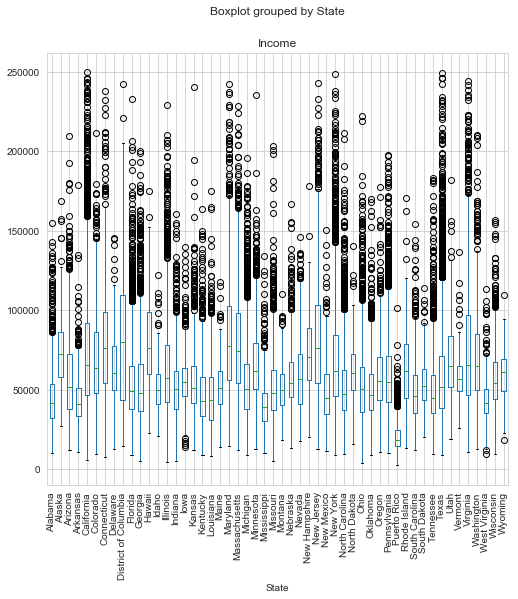

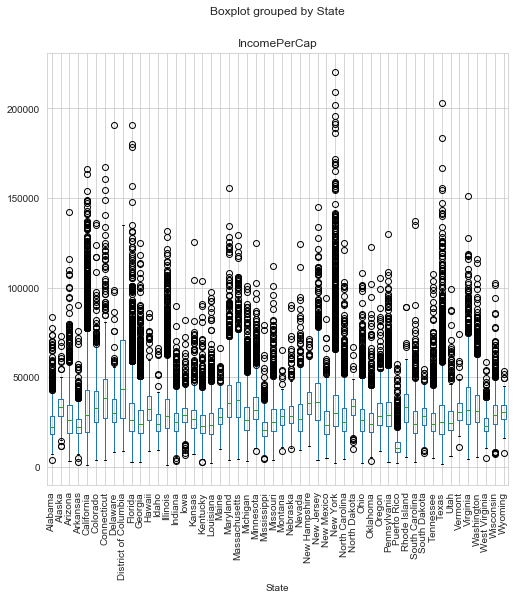

In [19]:
sns.set_style("whitegrid")
df_17_cln.boxplot(column="Income",  # Column to plot
                 by= "State",         # Column to split upon
                 figsize= (8,8))        # Figure size
plt.xticks(rotation=90);
df_17_cln.boxplot(column="IncomePerCap",  # Column to plot
                 by= "State",         # Column to split upon
                 figsize= (8,8))        # Figure size
plt.xticks(rotation=90);


These boxplots indicate that income and income per capita is very heavily skewed to the right. The state/territory with the lowest income by far is Puerto Rico. The state with the highest median income is the District of Columbia. DC also doesn't have any high end outliers and has very few outliers. The states with the highest incomes are California, Texas, and New York, which are some of the most populated states.

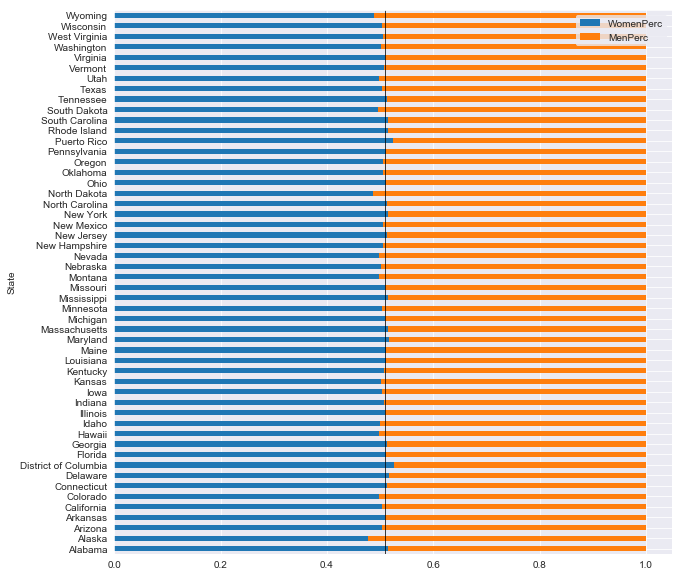

In [20]:
# Bar chart of the percentage of men and women in each state.
sns.set_style("darkgrid")
df_sum = df_17_cln.groupby(by=df_17_cln.State).sum()
df_sum.head()
df_sum['WomenPerc'] = df_sum['Women']/df_sum['TotalPop']
df_sum['MenPerc'] = df_sum['Men']/df_sum['TotalPop']
df_GenderPerc = df_sum.loc[: ,['WomenPerc', 'MenPerc']]
df_GenderPerc.plot(figsize= (10,10), kind='barh', stacked=True)
plt.axvline(x=0.51, linewidth=0.75, color='black');

According to Statista.com there were 159.41 million men and 165.92 Million women in the United States in 2017. This leads to the popualtion of the United States in 2017 being approximately 51% female. The graph above shows the percentage of men and women in each state. The vertical black line shows country-wide perentage of females at 51%. The states with the smallest percentage of women are Alaska, North Dakota, and Wyoming. All three of these states are in the bottom 5 in regards to population. Only about 13 states have female percentages that are visibly above the 51% line. This implies that those states must have on average higher populations then the states whose female percentages are below the 51% line.

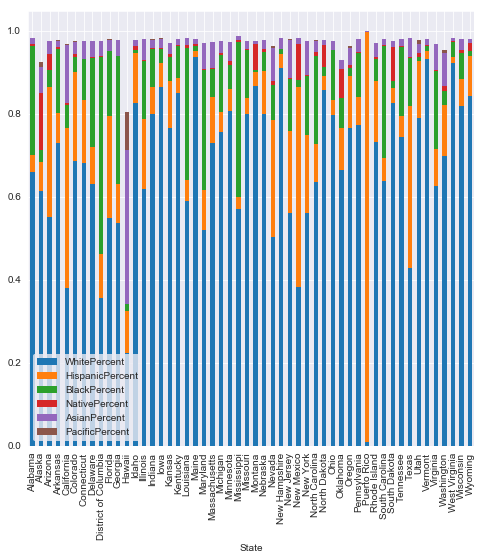

In [21]:
#Graph to compare race by percent composition in each state. Converted percents into counts for each
#tract, summed counts by state, and then found percent of each race by state.
df_17_race=df_17_cln[['TotalPop','State','White','Black','Hispanic','Asian','Native','Pacific']]
race=['White','Black','Hispanic','Asian','Native','Pacific']
df_17_race[race]/=100
df_17_race['WhiteCount']=df_17_race['White']*df_17_race['TotalPop']
df_17_race['BlackCount']=df_17_race['Black']*df_17_race['TotalPop']
df_17_race['NativeCount']=df_17_race['Native']*df_17_race['TotalPop']
df_17_race['HispanicCount']=df_17_race['Hispanic']*df_17_race['TotalPop']
df_17_race['AsianCount']=df_17_race['Asian']*df_17_race['TotalPop']
df_17_race['PacificCount']=df_17_race['Pacific']*df_17_race['TotalPop']
df_sum2 = df_17_race.groupby(by=df_17_race.State).sum()
df_sum2['WhitePercent'] = df_sum2['WhiteCount']/df_sum2['TotalPop']
df_sum2['BlackPercent'] = df_sum2['BlackCount']/df_sum2['TotalPop']
df_sum2['NativePercent'] = df_sum2['NativeCount']/df_sum2['TotalPop']
df_sum2['HispanicPercent'] = df_sum2['HispanicCount']/df_sum2['TotalPop']
df_sum2['AsianPercent'] = df_sum2['AsianCount']/df_sum2['TotalPop']
df_sum2['PacificPercent'] = df_sum2['PacificCount']/df_sum2['TotalPop']
df_racePerc = df_sum2.loc[: ,['WhitePercent', 'HispanicPercent','BlackPercent', 'NativePercent','AsianPercent','PacificPercent']]
df_racePerc.plot(kind='bar', stacked=True, figsize=(8,8));

This graph shows the racial distribution of each state. The most notable thing about the graph is almost all the the states dont add up to 100%. This implies that there is some other racial categories that people identify as that the census doesn't measure. White people take up the majority in all but 6 or 7 states. The next highest racial groups are black and hispanic. All of the states that border Mexico have the largest population of hispanic people besides Puerto Rico which is almost 100% hispanic. The largest percentage of black people is in the District of Columbia. Hawaii has the largest population of asians and pacific islanders.

#### Top 5 States with largest income per Capita by State:

In [22]:
#Top 5 states with the largest income per capita
df_5_counties_income = df_17_cln[["State", "IncomePerCap"]].groupby("State")["IncomePerCap"].sum().nlargest(5)
df_5_counties_income

State
California    270968116.0
New York      167209145.0
Texas         150221935.0
Florida       124533330.0
Illinois       99639936.0
Name: IncomePerCap, dtype: float64

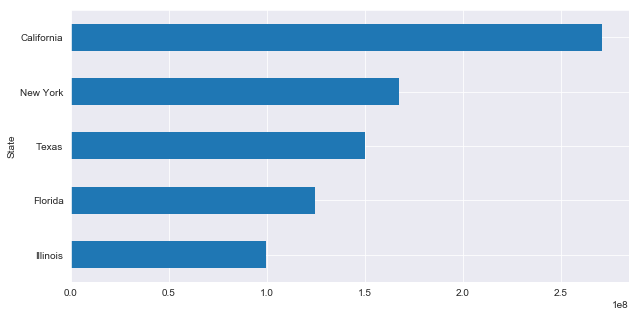

In [23]:
df_5_counties_income.sort_values().plot(kind="barh", x="IncomePerCap", y="State", figsize=(10, 5));

Above are the top 5 states ranked by income per capita. These states are California, New York, Texas, Florida, and Illinois.

#### Total Population by State:

In [24]:
#Get Total Population by State
df_pop_state = df_17_cln[["State", "TotalPop"]].groupby('State')["TotalPop"].sum()
df_pop_state.head()

State
Alabama        4842699
Alaska          735782
Arizona        6713931
Arkansas       2977897
California    38833329
Name: TotalPop, dtype: int64

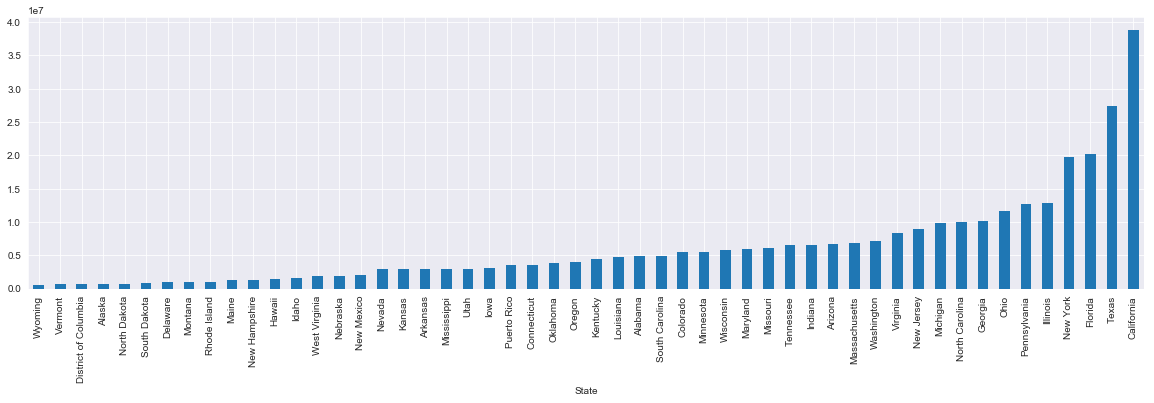

In [25]:
# Sorted, vertical bar
df_pop_state.sort_values().plot(kind="bar", x="State", y="TotalPop", figsize=(20, 5));

It is intereting to note, that the most populous states are also the states with the highest income per capita. They are almost in the same order as well. There could be a relationship between heavily populated states and higher income for its residents.

### Explore Joint Attributes

<div class="alert alert-block alert-info">
<b>Rubric 6:</b> Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.
</div>

Next we will focus on exploring the relationships between different attributes. To start, we created a correlation plot with all of the continuous attributes.

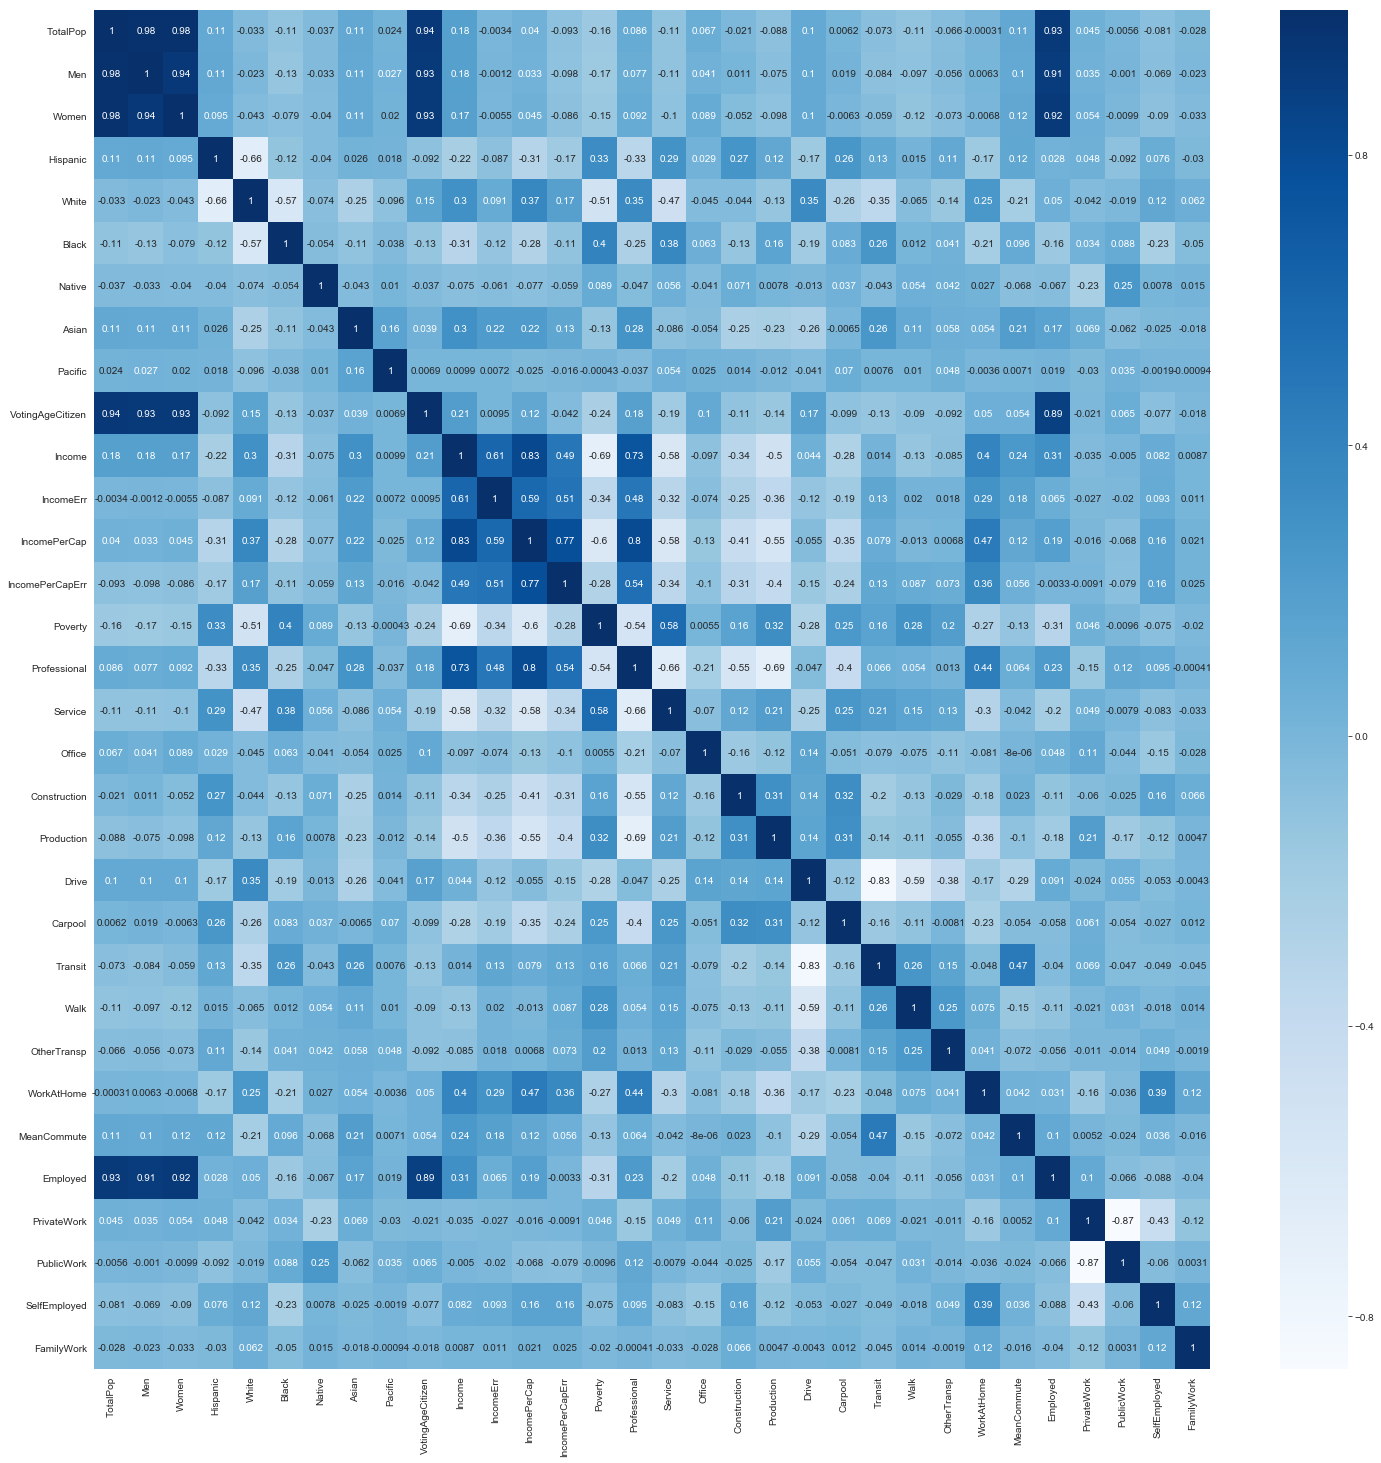

In [26]:
# Correlation plot for all the attributes. Maybe we can use to see if any of the attributes can be removed
# because they provide similar info.
df_attributes = df_17_cln.drop(['State', 'County', 'ChildPoverty', 'Unemployment'], axis=1)
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df_attributes.corr(), cmap="Blues", annot=True);

This plot shows the correlations between all continuous predictor variables. Total population is very positivly correlated with the number of men, women, voting age people, and employed people. This makes sense because the percentages of men, women, voting age people, and employed people are all relativily similar everywhere. The variables correlated with total population are also highly correlated with each other. Income per capita is also highly positivly correlated with income and that makes sense as well. Public work and private work are highly negativly correlated. It implies that either someone works in the private sector or they work in the public sector. Considering that most people only have one job, this makes sense. Lastly, driving and public transit are higly negativly correlated as well. It makes sense that someone would either take public transit or drive and not usually do both. We can use the heat map above indicates which variables may not be necessary to use as predictors because they repeat information given by another variable.

#### Correlation of Income to Poverty:

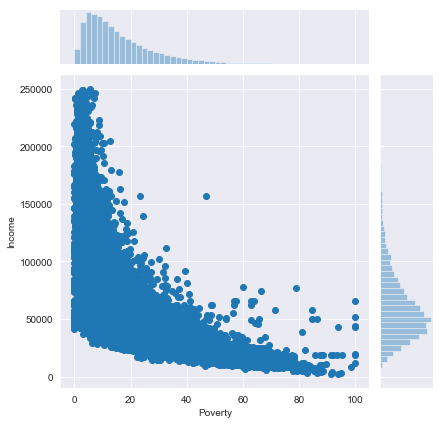

In [27]:
sns.set_context(rc = {'patch.linewidth': 1})
sns.jointplot(x='Poverty', y='Income', data=df_17_cln);

#### Correlation of Unemployment to Poverty (linear regression with marginal distributions): 

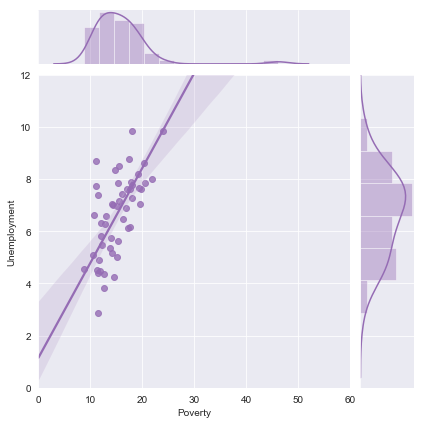

In [28]:
df_jp = pd.pivot_table(df_17_cln, values=["Unemployment","Poverty"], index="State", aggfunc=np.mean)
g = sns.jointplot(data=df_jp, kind="reg", xlim=(0,60), ylim=(0,12), color = "m",height = 6,
                  y='Unemployment', x='Poverty')

From the scatter plot the correlation between Unemployment and poverty is seen for each state. May be useful in future prediction algorithm. The two variables are quite normal in terms of distribution.

#### Poverty by State:

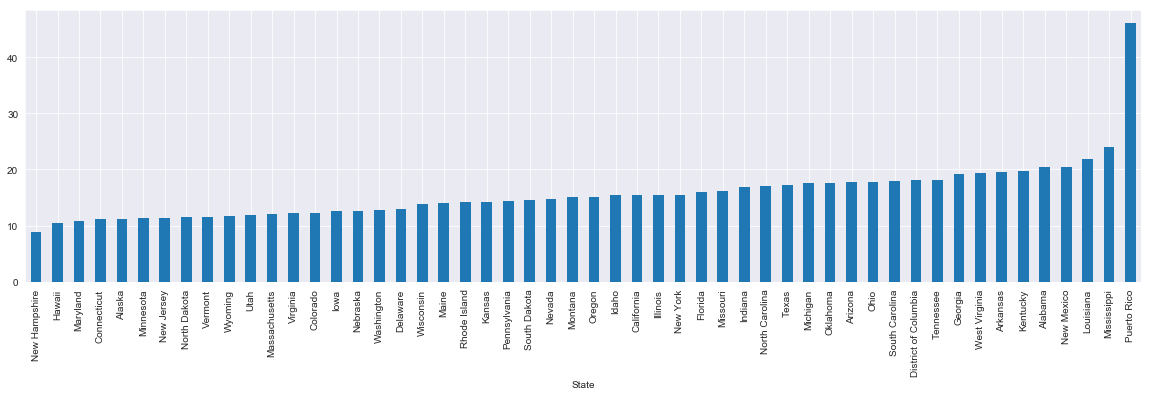

In [29]:
sns.set_context(rc = {'patch.linewidth': 0})
df_corr_income_poverty = pd.pivot_table(df_17_cln, values=["Income","Poverty"], index="State", aggfunc=np.mean)
df_corr_income_poverty["Poverty"].sort_values().plot(kind="bar", y="Poverty", x=df_corr_income_poverty.index, figsize=(20,5));

From the bar plot above the states with the highest poverty are Puerto Rico, Mississipi, Louisiana, New Mexico and Alabama.

#### Child Poverty by State's Total population: 

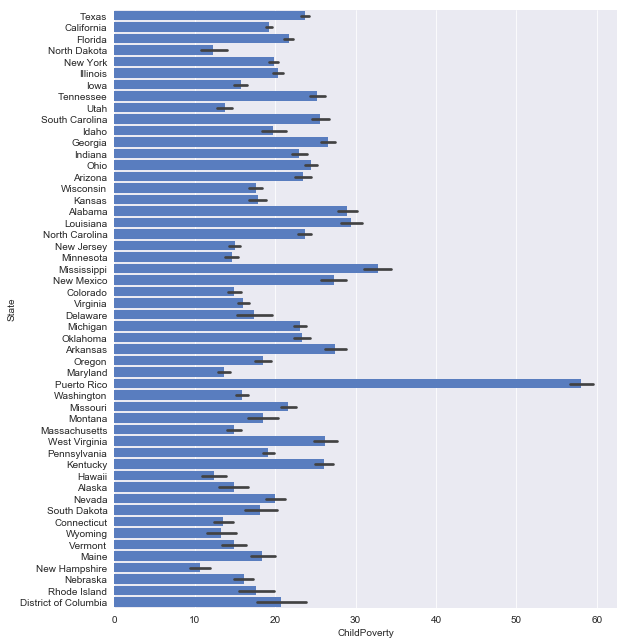

In [36]:
# create a new dataframe sorted by total population descending:
childpoverty = df_17_cln.sort_values('TotalPop', axis=0, ascending=False)
#childpoverty.head()
plt.figure(figsize=(9,11))

sns.barplot(x=childpoverty['ChildPoverty'], 
            y=childpoverty['State'], 
            data=childpoverty, label='Child Poverty', 
            color='b')
sns.despine(left=True, bottom=True);

From the bar plot above the states with the highest Childhood poverty are Puerto Rico, Mississipi, Louisiana, New Mexico and Alabama.

### Explore Attributes and Class

<div class="alert alert-block alert-info">
<b>Rubric 7:</b> Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).
</div>

Our ultimate goal is to predict child poverty and unemployment rates for this dataset. To allow us to make these predictions in either a regression or a classification setting, we first created new features that split the target variables into discrete categories.

low          18665
med          18321
very_high    18157
high         17746
Name: UnempCat, dtype: int64


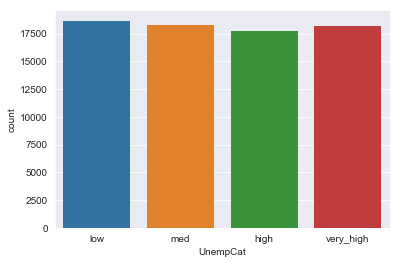

In [37]:
#Categorizing the unemployed percentages in range
#Makes cutoffs using quartiles of clean dataset, so they are roughly equal
df_17_cln['UnempCat'] = pd.cut(df_17_cln.Unemployment,[-1,3.9,6,9,101],labels=['low','med','high','very_high'])
print (df_17_cln.UnempCat.value_counts())

#Show histogram of the categories
#draw histogram plot
sns.countplot(x = 'UnempCat', data = df_17_cln)
plt.show()

In [38]:
df_17_cln.groupby(by='UnempCat').median()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
UnempCat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
low,4193.0,2056.0,2122.0,5.2,82.3,2.0,0.0,1.9,0.0,3059.0,69310.0,9556.0,34755.0,4124.0,7.5,7.7,41.9,14.3,22.8,7.1,9.1,81.3,7.4,0.6,1.2,1.0,4.9,24.4,2134.0,80.5,12.7,5.8,0.0,2.8
med,4365.0,2140.0,2211.0,6.8,76.5,2.7,0.0,1.9,0.0,3132.0,61971.0,8927.0,30613.0,3681.0,9.8,11.6,36.9,16.2,23.2,8.1,10.7,81.0,8.1,0.8,1.2,1.1,4.2,25.7,2133.0,80.5,12.9,5.7,0.0,5.0
high,4229.0,2072.5,2146.0,9.1,67.7,4.3,0.0,1.5,0.0,2965.0,52182.0,8126.0,26007.0,3291.0,13.9,18.4,31.6,18.6,23.4,9.1,12.6,80.1,9.0,1.0,1.3,1.2,3.5,25.9,1947.0,80.5,13.0,5.5,0.0,7.3
very_high,3720.0,1797.0,1909.0,11.3,34.5,13.1,0.0,0.7,0.0,2514.0,36852.0,6752.0,18848.0,2751.0,25.3,35.4,24.5,23.2,23.7,9.2,15.0,76.3,10.1,2.1,1.9,1.4,2.7,25.5,1444.0,80.7,13.3,4.9,0.0,12.3


#### Relationship between Unemployment and Race:

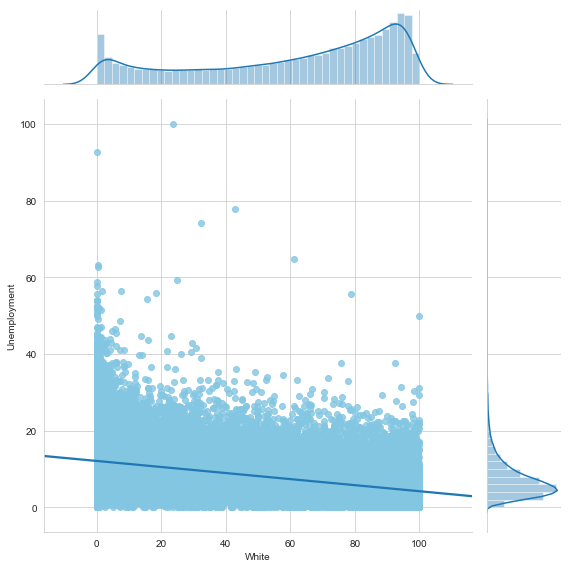

In [39]:
sns.set_style("whitegrid")
sns.set_context(rc = {'patch.linewidth': 1})
sns.jointplot(x='White', y='Unemployment', data=df_17_cln, kind='reg',scatter_kws={'color':'c'}, size=8);

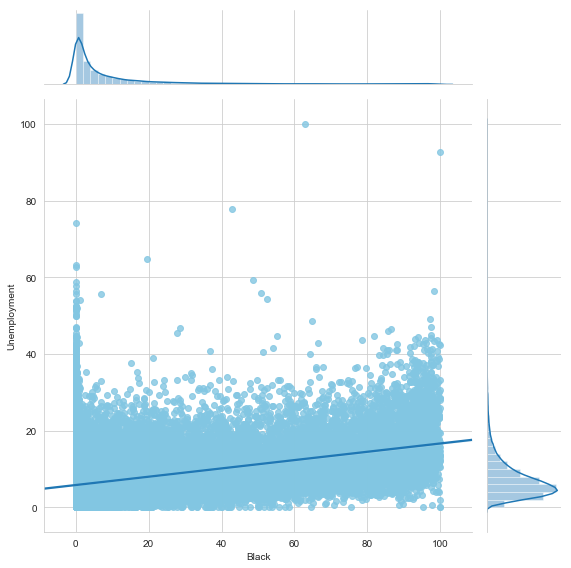

In [40]:
sns.jointplot(x='Black', y='Unemployment', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8);

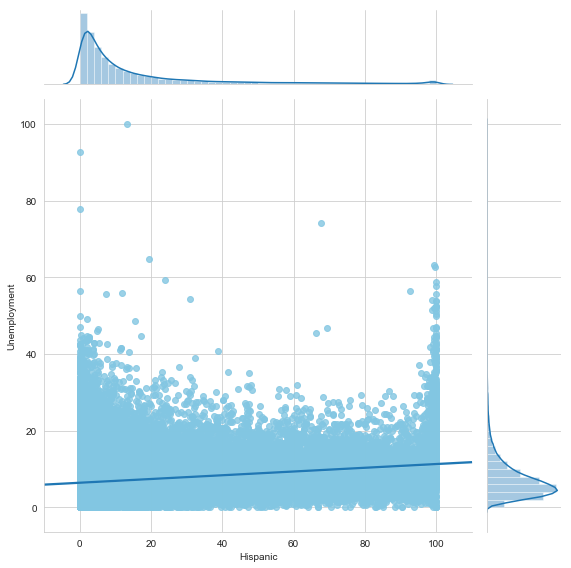

In [41]:
sns.jointplot(x='Hispanic', y='Unemployment', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8);

As can be seen from the above scatterplots the Unemployment rate and the ethnic/racial group percentage shows a strong correlation. There are clear patterns in the data indicating that the Unemployment rate is correlated either in a positive or negative direction depending on the ethnic/racial breakdown of a particular community.

#### Relationship between Child Poverty and Race:

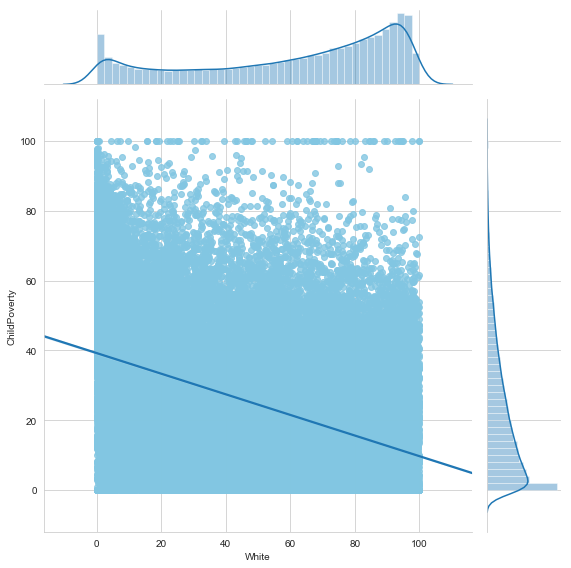

In [42]:
sns.jointplot(x='White', y='ChildPoverty', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8);

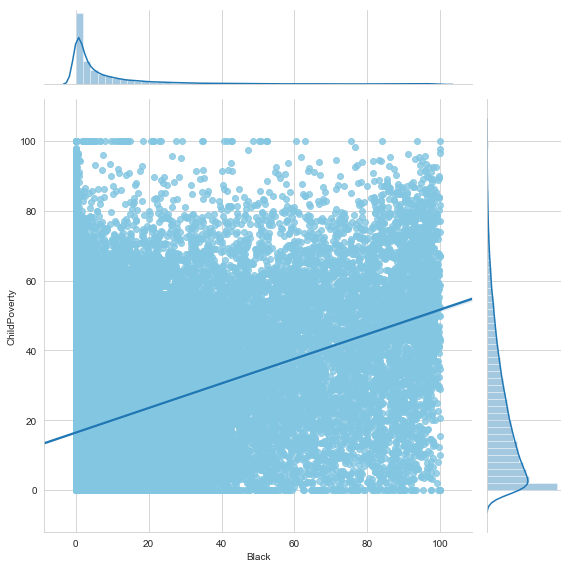

In [43]:
sns.jointplot(x='Black', y='ChildPoverty', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8);

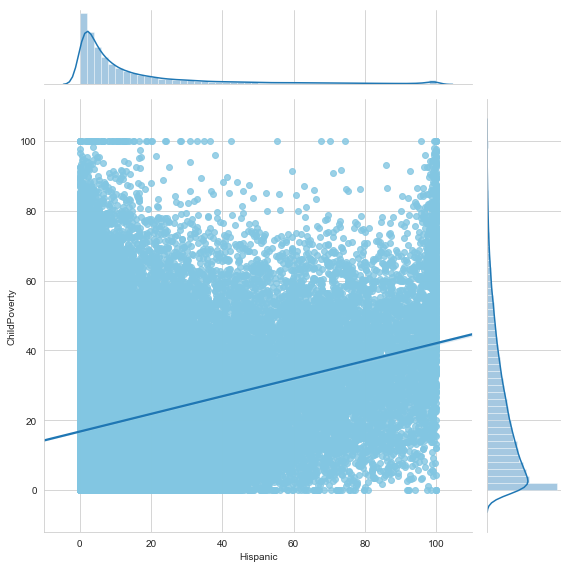

In [44]:
sns.jointplot(x='Hispanic', y='ChildPoverty', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8);

As can be seen from the above scatterplots the Child poverty rate and the ethnic/racial group percentage shows a strong correlation. There are clear patterns in the data indicating that the Child poverty rate is correlated either in a positive or negative direction depending on the ethnic/racial breakdown of a particular community.

### New Features

<div class="alert alert-block alert-info">
<b>Rubric 8:</b> Are there other features that could be added to the data or created from existing features? Which ones?
</div>

From the initial exploratory analysis performed on the dataset in the prior rubrics the scatterplots between the Unemployment rate and the ethnic/racial group percentage showed a strong correlation. There were clear patterns in the data indicating that the Unemployment rate, the Child Poverty rate, correlated either in a positive or negative direction depending on the ethnic/racial breakdown of a particular community. 

After examining exploratory plots and relationships between variables, it is apparent that there are potential underlying factors or variables that drive the levels of Unemployment and Child Poverty rate. There is an opportunity to examine the economic differences between Men and Women, and their respective employment positions, i.e. Professional, Office, Service, Construction, Production, and Public Work or Private Work. We will now perform a principal component analysis, aiming to find a relationship between the different demographic and/or racial groups and their respective professional groups. 

#### Create New Features:

In [45]:
df_17_cln['Men_perc'] = df_17_cln['Men'] / (df_17_cln['Men'] + df_17_cln['Women'])
df_17_cln['Women_perc'] = df_17_cln['Women'] / (df_17_cln['Men'] + df_17_cln['Women'])
df_17_cln['Employed_thousands'] = df_17_cln['Employed'] / 1000
df_17_cln['Income_thousands'] = df_17_cln['Income'] / 1000

#### Rebuild the dataframe with new features:

In [46]:
# create a subset of plottable features:
features_plot = ['Women_perc', 
                 'Income_thousands', 
                 'Professional', 
                 'Service', 
                 'Office', 
                 'Construction', 
                 'Production', 
                 'Drive', 
                 'Carpool', 
                 'Transit', 
                 'Walk', 
                 'OtherTransp', 
                 'WorkAtHome', 
                 'MeanCommute', 
                 'Employed_thousands', 
                 'PrivateWork', 
                 'PublicWork', 
                 'SelfEmployed', 
                 'FamilyWork']

cluster_plot_df = df_17_cln[features_plot]

In [47]:
cluster_plot_df.head()

,Women_perc,Income_thousands,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed_thousands,PrivateWork,PublicWork,SelfEmployed,FamilyWork
TractId,,,,,,,,,,,,,,,,,,,
1001020100,0.512737,67.826,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,0.881,74.2,21.2,4.5,0.0
1001020200,0.462707,41.287,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,0.852,75.9,15.0,9.0,0.0
1001020300,0.547120,46.806,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1.482,73.3,21.1,4.8,0.7
1001020400,0.531052,55.895,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1.849,75.8,19.7,4.5,0.0
1001020500,0.492825,68.143,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4.787,71.4,24.1,4.5,0.0


In [48]:
cluster_plot_df.columns

Index(['Women_perc', 'Income_thousands', 'Professional', 'Service', 'Office',
       'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk',
       'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed_thousands',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork'],
      dtype='object')

In [50]:
from sklearn.decomposition import PCA

X = cluster_plot_df
#y = iris.target
#target_names = iris.target_names

pca = PCA(n_components=19)
pca.fit(X) # fit data and then transform it
X_pca = pca.transform(X)

# print the components

print ('pca:', pca.components_)

pca: [[-4.26073733e-05  8.98775019e-01  3.71876179e-01 -1.52146277e-01
  -1.84936422e-02 -7.04677994e-02 -1.30764824e-01  1.56289564e-02
  -5.05122360e-02  8.04710697e-03 -1.68119070e-02 -5.48887284e-03
   4.91218707e-02  4.74288691e-02  1.03413011e-02 -1.63722040e-02
   5.58524874e-03  1.06765029e-02  1.11410511e-04]
 [ 6.49956465e-05 -2.55156292e-02  7.20349406e-02  1.07240504e-01
  -4.08994218e-02 -6.25350751e-02 -7.58348123e-02 -7.76921840e-01
  -1.59054927e-04  5.67609991e-01  1.45965197e-01  4.13267501e-02
   2.21719474e-02  1.46057339e-01 -4.14722067e-03  1.66247560e-02
  -1.97936123e-02  3.57657187e-03 -3.97824232e-04]
 [ 1.35268614e-04 -3.20465123e-01  5.81169945e-01 -1.16110240e-01
  -5.61839709e-02 -1.29909809e-01 -2.78933056e-01 -2.05925191e-03
  -1.03034074e-01 -8.37697388e-02  1.07519157e-01  2.16024899e-02
   5.97198306e-02 -1.75375720e-01 -9.26937068e-03 -4.64449438e-01
   4.06512733e-01  5.64205783e-02  1.51447991e-03]
 [-4.54116202e-04  2.26009540e-01 -4.54262864e-01 

In [51]:
for dimension in range(X_pca.shape[1]):
    variance = pca.explained_variance_ratio_[:dimension].sum() * 100.0
    print("PCA with %d components retains: %.3f of variance" % (dimension,variance))

PCA with 0 components retains: 0.000 of variance
PCA with 1 components retains: 57.077 of variance
PCA with 2 components retains: 75.249 of variance
PCA with 3 components retains: 82.247 of variance
PCA with 4 components retains: 87.084 of variance
PCA with 5 components retains: 89.999 of variance
PCA with 6 components retains: 92.358 of variance
PCA with 7 components retains: 94.163 of variance
PCA with 8 components retains: 95.897 of variance
PCA with 9 components retains: 97.138 of variance
PCA with 10 components retains: 98.186 of variance
PCA with 11 components retains: 99.153 of variance
PCA with 12 components retains: 99.623 of variance
PCA with 13 components retains: 99.931 of variance
PCA with 14 components retains: 99.986 of variance
PCA with 15 components retains: 100.000 of variance
PCA with 16 components retains: 100.000 of variance
PCA with 17 components retains: 100.000 of variance
PCA with 18 components retains: 100.000 of variance


In [52]:
k = 0
total_variance = pca.explained_variance_.sum()
var_till_now = 0;

while (var_till_now/total_variance) < 0.99 :
    var_till_now += pca.explained_variance_[k]
    k = k + 1
    
print("Keeping variance = 99% of total variance , dimensions needed :",k)

k = 0;
var_till_now = 0;

while (var_till_now/total_variance) < 0.93 :
    var_till_now += pca.explained_variance_[k]
    k = k + 1
    
print("Keeping variance = 93% of total variance , dimensions needed :",k)

Keeping variance = 99% of total variance , dimensions needed : 11
Keeping variance = 93% of total variance , dimensions needed : 7


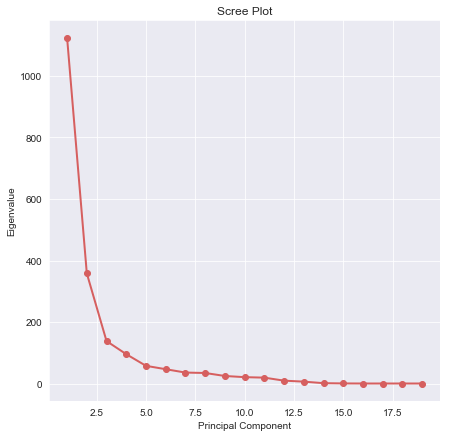

In [53]:
#Draw a scree plot
#Reference: https://stats.stackexchange.com/questions/12819/how-to-draw-a-scree-plot-in-python
sns.set_style("darkgrid")
fig = plt.figure(figsize=(7,7))
var = pca.explained_variance_
num = [i+1 for i in range(len(var))]

plt.plot(num, var, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

From the Scree plot above about 6 components explain the 92% of total variance.  

In [54]:
#Match the labels of components
pc = pca.components_[:10]
pc = pd.DataFrame(pc)
pc.columns = cluster_plot_df.columns.values
pc.head()

,Women_perc,Income_thousands,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed_thousands,PrivateWork,PublicWork,SelfEmployed,FamilyWork
0,-0.000043,0.898775,0.371876,-0.152146,-0.018494,-0.070468,-0.130765,0.015629,-0.050512,0.008047,-0.016812,-0.005489,0.049122,0.047429,0.010341,-0.016372,0.005585,0.010677,0.000111
1,0.000065,-0.025516,0.072035,0.107241,-0.040899,-0.062535,-0.075835,-0.776922,-0.000159,0.567610,0.145965,0.041327,0.022172,0.146057,-0.004147,0.016625,-0.019794,0.003577,-0.000398
2,0.000135,-0.320465,0.581170,-0.116110,-0.056184,-0.129910,-0.278933,-0.002059,-0.103034,-0.083770,0.107519,0.021602,0.059720,-0.175376,-0.009269,-0.464449,0.406513,0.056421,0.001514
3,-0.000454,0.226010,-0.454263,0.182140,-0.033756,0.225580,0.080287,-0.014751,0.097458,0.047511,-0.089670,-0.017009,-0.023580,0.223452,-0.006826,-0.577045,0.489931,0.084022,0.003096
4,-0.001158,0.131315,-0.099585,0.108508,-0.239021,0.138994,0.091080,-0.378228,0.290850,-0.478869,0.338801,0.094293,0.133154,-0.511535,-0.010876,-0.037479,-0.068018,0.100514,0.004953


In [55]:
for i in range(len(pc)):
    pc1 = pc.iloc[i]
    print('component {}:\n {}\n'.format(i+1,pc1[abs(pc1)>=0.2]))

component 1:
 Income_thousands    0.898775
Professional        0.371876
Name: 0, dtype: float64

component 2:
 Drive     -0.776922
Transit    0.567610
Name: 1, dtype: float64

component 3:
 Income_thousands   -0.320465
Professional        0.581170
Production         -0.278933
PrivateWork        -0.464449
PublicWork          0.406513
Name: 2, dtype: float64

component 4:
 Income_thousands    0.226010
Professional       -0.454263
Construction        0.225580
MeanCommute         0.223452
PrivateWork        -0.577045
PublicWork          0.489931
Name: 3, dtype: float64

component 5:
 Office        -0.239021
Drive         -0.378228
Carpool        0.290850
Transit       -0.478869
Walk           0.338801
MeanCommute   -0.511535
Name: 4, dtype: float64

component 6:
 Service         0.612513
Office          0.376053
Construction   -0.333503
Production     -0.478633
MeanCommute    -0.226274
Name: 5, dtype: float64

component 7:
 Service      -0.486208
Office        0.708489
Production   -0.2514

Each of the principal components have multiple predictor variables, and only a few of them have one or two dominant variables, while most of them consist of equally important variables.

To further make it clearer that which predictor variables act a major role in estabishing the principal components, we apply the varimax rotation, which push each contribution of predictor variables to either 1/-1 or 0 without damaging the structure of the principal components.

#### Varimax Rotation https://en.wikipedia.org/wiki/Talk:Varimax_rotation:

In [56]:
from scipy import eye, asarray, dot, sum
from scipy.linalg import svd
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    #reference: https://en.wikipedia.org/wiki/Talk:Varimax_rotation
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, np.diag(np.diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

In [57]:
pc_r = varimax(pca.components_)
pc_r = pd.DataFrame(pc_r)
pc_r.columns = cluster_plot_df.columns.values

In [58]:
for i in range(10):
    pc1_r = pc_r.iloc[i]
    print('component {}:\n {}\n'.format(i+1,pc1_r[abs(pc1_r)>=0.2]))

component 1:
 Income_thousands    1.0
Name: 0, dtype: float64

component 2:
 Drive   -1.0
Name: 1, dtype: float64

component 3:
 Professional    1.0
Name: 2, dtype: float64

component 4:
 PrivateWork   -1.0
Name: 3, dtype: float64

component 5:
 MeanCommute   -1.0
Name: 4, dtype: float64

component 6:
 Service    1.0
Name: 5, dtype: float64

component 7:
 Office    1.0
Name: 6, dtype: float64

component 8:
 Production   -1.0
Name: 7, dtype: float64

component 9:
 Carpool    1.0
Name: 8, dtype: float64

component 10:
 Construction   -1.0
Name: 9, dtype: float64



### Exceptional Work

<div class="alert alert-block alert-info">
<b>Rubric 9:</b> You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.
</div>

#### LDA Analysis

Linear Discriminant Analysis (LDA) for unemployment would identify the attributes showing the most variance between classes. LDA is a supervised learning using class labels. We can separate the pverty based on the Us territories by poverty rate.

In [59]:
df_17_cln['Unemp'] = pd.cut(df_17_cln.Unemployment,[-1,6,12,16,101],labels=['low','med','high','very_high'])
print (df_17_cln.UnempCat.value_counts())

low          18665
med          18321
very_high    18157
high         17746
Name: UnempCat, dtype: int64


In [60]:
#Computing dimensional mean vectors
#ref: https://www.apsl.net/blog/2017/07/18/using-linear-discriminant-analysis-lda-data-explore-step-step/

np.set_printoptions(precision=6)# Here we used the Ratios on several variables for LDA analysis

#Ratio of Income Error to Income
df_17_cln['IncErrRatio'] = df_17_cln['IncomeErr'] / df_17_cln['Income']
#Ratio of Income percapita error to Income percapita
df_17_cln['IncPCErrRatio'] = df_17_cln['IncomePerCapErr'] / df_17_cln['IncomePerCap']
#Ratio of Voting Age citizens to total population
df_17_cln['VotingAgeR'] = df_17_cln['VotingAgeCitizen']/df_17_cln['TotalPop']
# Ratio of Employed to total population
df_17_cln['EmpRatio'] = df_17_cln['Employed']/df_17_cln['TotalPop']
# Ratio of Individual race on total population


x = df_17_cln[[ 'EmpRatio','VotingAgeR','Professional','MeanCommute']].values
y = df_17_cln['Unemp'].values

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'low', 2: 'med', 3: 'high', 4: 'very_high'}
# Mean vectors for each class obtained on LDA
print ("The dimensional mean vectors are as below for each class:")
mean_vec = []
for cl in range(1,5):
    mean_vec.append(np.mean(x[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vec[cl-1]))

The dimensional mean vectors are as below for each class:
Mean Vector class 1: [ 0.389611  0.685906 24.66353  26.45077 ]

Mean Vector class 2: [ 0.500901  0.731536 41.316636 25.676697]

Mean Vector class 3: [ 0.451559  0.7066   31.904757 26.480086]

Mean Vector class 4: [ 0.321463  0.699148 21.815059 26.625931]



Within class and Between class scatter matrix is created in the following code.

In [61]:
#Within class scatter matrix creation
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vec):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in x[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 4.033443e+02  2.385809e+01  2.366121e+04  1.438460e+03]
 [ 2.385809e+01  7.230251e+02  2.568869e+04 -9.043151e+03]
 [ 2.366121e+04  2.568869e+04  1.317538e+07  6.738418e+05]
 [ 1.438460e+03 -9.043151e+03  6.738418e+05  3.366723e+06]]


In [62]:
#Between class scatter matrix creation
all_mean = np.mean(x, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vec):  
    n = x[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    all_mean = all_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - all_mean).dot((mean_vec - all_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 1.710144e+02  4.626093e+01  2.173763e+04 -1.161437e+03]
 [ 4.626093e+01  1.706225e+01  6.919092e+03 -4.286245e+02]
 [ 2.173763e+04  6.919092e+03  3.011836e+06 -1.778843e+05]
 [-1.161437e+03 -4.286245e+02 -1.778843e+05  1.224182e+04]]



Calculating the generalized values of LDA and print the Eigen vectors and validating them.

In [63]:
#The generalized values of linear discriminants are printed
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.999703]
 [ 0.024128]
 [ 0.002912]
 [-0.001951]]
Eigenvalue 1: 5.06e-01

Eigenvector 2: 
[[-0.971718]
 [ 0.236023]
 [ 0.006743]
 [-0.003404]]
Eigenvalue 2: 2.04e-02

Eigenvector 3: 
[[ 0.152298]
 [ 0.988255]
 [-0.002647]
 [ 0.012232]]
Eigenvalue 3: 6.53e-04

Eigenvector 4: 
[[-0.381816]
 [-0.924076]
 [ 0.005841]
 [ 0.016299]]
Eigenvalue 4: 7.95e-18


In [64]:
#validating the Eigen vector's values calculations have no errors
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print("Validated",'ok')

Validated ok


The Eigen vectors and eigen values provide us with distortion of the linear transformation. The eigenvector shows the direction and the eigenvalues show the magnitude of distortion.

In [65]:
# Make a list of (eigenvalue, eigenvector) values and sorted
eig_pair = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pair = sorted(eig_pair, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pair:
    print(i[0])

Eigenvalues in decreasing order:

0.5057463267153132
0.020447296035762893
0.0006534611129458491
7.950247371510214e-18


Printing the eigen values for the eigen vectors in decreasing order.

In [66]:
#Printing variance in percentage 
print('Variance percentage explained:\n')
ev_sum = sum(eig_vals)
for i,j in enumerate(eig_pair):
    print('eigen_value {0:}: {1:.2%}'.format(i+1, (j[0]/ev_sum).real))

Variance percentage explained:

eigen_value 1: 95.99%
eigen_value 2: 3.88%
eigen_value 3: 0.12%
eigen_value 4: 0.00%


The first eigenvector has most information and so we would not lose (98%) if we create a one dimension feature based on the values printed in decreasing order.

In [67]:
#Choose largest eigenvalues
W = np.hstack((eig_pair[0][1].reshape(4,1), eig_pair[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

#Transforming the sample to new space
X_lda = x.dot(W)


Matrix W:
 [[ 0.999703 -0.971718]
 [ 0.024128  0.236023]
 [ 0.002912  0.006743]
 [-0.001951 -0.003404]]


Here we visualize the scatter plot

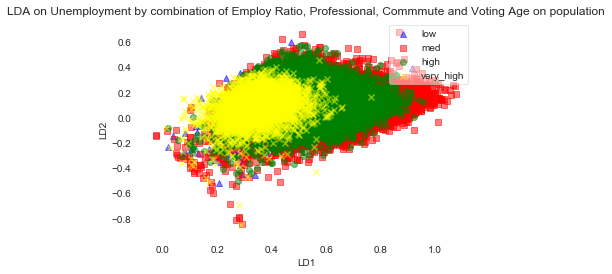

In [68]:
#LDA using Scikit learn - Code is modified from www.apsl.net blog
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(x, y)

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,5),('^', 's', 'o', 'x'),('blue', 'red', 'green', 'yellow')):

        plt.scatter(x=X_lda[:,0][y == label],
                    y=X_lda[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)
    
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

sns.set_style("whitegrid")
plot_scikit_lda(X_lda_sklearn, title='LDA on Unemployment by combination of Employ Ratio, Professional, Commmute and Voting Age on population')


### References

- https://www.kaggle.com/pstetz/comprehensive-look-at-the-2015-acs-estimate
- https://github.com/yuydu/data-project/blob/ce5af4a7c54bfe72279e8bf7b565434aa470ee22/Loan%20Status%20Analysis/PCA%2C%20KNN%20and%20Random%20Forest%20Clsifier.ipynb
- https://www.kaggle.com/bigironsphere/tutorial-maps-eda-and-models-with-nyc-census-data/notebook
- https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html
- https://seaborn.pydata.org/tutorial.html
- https://nbviewer.jupyter.org/github/tejten/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb
- https://www.kaggle.com/pstetz/comprehensive-look-at-the-2015-acs-estimate#%5E-General
- https://www.apsl.net/blog/2017/07/18/using-linear-discriminant-analysis-lda-data-explore-step
